In [130]:
import pandas as pd
pd.__version__
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [131]:
data = pd.read_csv('summer_internship_takehome.csv')
data2 = data

In [132]:
rent_adjusted = pd.DataFrame(columns=['State', 'Owned', 'Adjusted profit margin'])
percent_adjusted = pd.DataFrame(columns=['Rent adjusted profit margin %'])
rent_adjusted_by_type = pd.DataFrame(columns=['Type', 'Average adjusted profit margin'])
rent_adjusted_by_state = pd.DataFrame(columns=['State', 'Average adjusted profit margin'])

/Users/philipkendler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/philipkendler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/philipkendler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/philipkendler/opt/anaconda3/lib/p

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a029310>]],
      dtype=object)

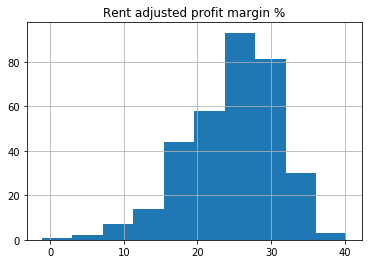

In [133]:
TX_rent = 0
TX_count = 0
CA_rent = 0
CA_count = 0
IL_rent = 0
IL_count = 0
GA_rent = 0
GA_count = 0
NJ_rent = 0
NJ_count = 0
CO_rent = 0
CO_count = 0
WA_rent = 0
WA_count = 0
for i in data.index:
    if data.at[i, 'Rental cost'] > 0:
        if data.at[i, 'State'] == 'TX':
            TX_rent += data.at[i, 'Rental cost']
            TX_count += 1
        elif data.at[i, 'State'] == 'CA':
            CA_rent += data.at[i, 'Rental cost']
            CA_count += 1
        elif data.at[i, 'State'] == 'IL':
            IL_rent += data.at[i, 'Rental cost']
            IL_count += 1
        elif data.at[i, 'State'] == 'GA':
            GA_rent += data.at[i, 'Rental cost']
            GA_count += 1
        elif data.at[i, 'State'] == 'NJ':
            NJ_rent += data.at[i, 'Rental cost']
            NJ_count += 1
        elif data.at[i, 'State'] == 'CO':
            CO_rent += data.at[i, 'Rental cost']
            CO_count += 1
        else:
            WA_rent += data.at[i, 'Rental cost']
            WA_count += 1
TX_avg_rent = TX_rent / TX_count
CA_avg_rent = CA_rent / CA_count
IL_avg_rent = IL_rent / IL_count
GA_avg_rent = GA_rent / GA_count
NJ_avg_rent = NJ_rent / NJ_count
CO_avg_rent = CO_rent / CO_count
WA_avg_rent = WA_rent / WA_count

for i in data2.index:
    if data2.at[i, 'Rental cost'] == 0:
        if data2.at[i, 'State'] == 'TX':
            data2['Rental cost'][i] += TX_avg_rent
        elif data2.at[i, 'State'] == 'CA':
            data2['Rental cost'][i] += CA_avg_rent
        elif data2.at[i, 'State'] == 'IL':
            data2['Rental cost'][i] += IL_avg_rent
        elif data2.at[i, 'State'] == 'GA':
            data2['Rental cost'][i] += GA_avg_rent
        elif data2.at[i, 'State'] == 'NJ':
            data2['Rental cost'][i] += NJ_avg_rent
        elif data2.at[i, 'State'] == 'CO':
            data2['Rental cost'][i] += CO_avg_rent
        else:
            data2['Rental cost'][i] += WA_avg_rent
for i in data2.index:
    if i % 12 == 0:
        revenue = data2.at[i, 'Gross revenue']
        costs = (data2.at[i, 'Fixed cost'] + data2.at[i, 'Variable cost'] + data2.at[i, 'Rental cost'])
        state = data.at[i, 'State']
        owned = data.at[i, 'Owned']
    else:
        revenue += data2.at[i, 'Gross revenue']
        costs += (data2.at[i, 'Fixed cost'] + data2.at[i, 'Variable cost'] + data2.at[i, 'Rental cost'])
    if i % 12 == 11:
        adjusted_profit_margin = (revenue - costs) / revenue
        rent_adjusted = rent_adjusted.append({'State': state, 'Owned': owned,'Adjusted profit margin': adjusted_profit_margin}, ignore_index=True)
        rent_adjusted.sort_values(by=['Adjusted profit margin'], inplace = True)
for i in rent_adjusted.index:
    percent_adjusted = percent_adjusted.append({'Rent adjusted profit margin %': (rent_adjusted.at[i, 'Adjusted profit margin']) * 100,}, ignore_index = True)
percent_adjusted.hist()

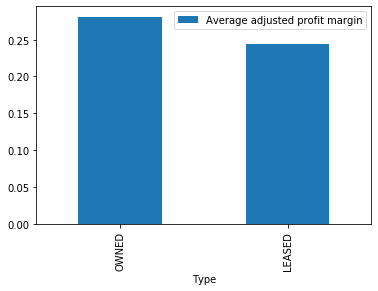

In [134]:
profit_owned = 0
profit_leased = 0
owned_count = 0
leased_count = 0
for i in rent_adjusted.index:
    if rent_adjusted.at[i, 'Owned'] == True:
        owned_count += 1
        profit_owned += rent_adjusted.at[i, 'Adjusted profit margin']
    else:
        leased_count += 1
        profit_leased += rent_adjusted.at[i, 'Adjusted profit margin']
average_profit_owned = profit_owned / owned_count
average_profit_leased = profit_leased / leased_count

rent_adjusted_by_type = rent_adjusted_by_type.append({'Type': 'OWNED', 'Average adjusted profit margin': average_profit_owned}, ignore_index = True)
rent_adjusted_by_type = rent_adjusted_by_type.append({'Type': 'LEASED', 'Average adjusted profit margin': average_profit_leased}, ignore_index = True)
rent_adjusted_by_type.plot(x='Type', y='Average adjusted profit margin', kind = 'bar')


    

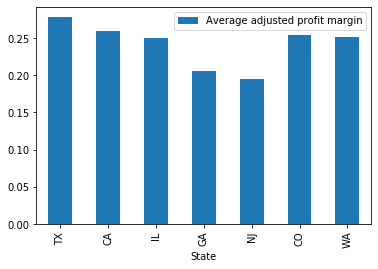

In [129]:
TX_profit = 0
CA_profit = 0
IL_profit = 0
GA_profit = 0
NJ_profit = 0
CO_profit = 0
WA_profit = 0
TX_count = 0
CA_count = 0
IL_count = 0
GA_count = 0
NJ_count = 0
CO_count = 0
WA_count = 0
for i in rent_adjusted.index:        
    if rent_adjusted.at[i, 'State'] == 'TX':
        TX_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        TX_count += 1
    elif rent_adjusted.at[i, 'State'] == 'CA':
        CA_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        CA_count += 1
    elif rent_adjusted.at[i, 'State'] == 'IL':
        IL_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        IL_count += 1
    elif rent_adjusted.at[i, 'State'] == 'GA':
        GA_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        GA_count += 1
    elif rent_adjusted.at[i, 'State'] == 'NJ':
        NJ_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        NJ_count += 1
    elif rent_adjusted.at[i, 'State'] == 'CO':
        CO_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        CO_count += 1
    elif rent_adjusted.at[i, 'State'] == 'WA':
        WA_profit += rent_adjusted.at[i, 'Adjusted profit margin']
        WA_count += 1
TX_average_profit = TX_profit / TX_count
CA_average_profit = CA_profit / CA_count
IL_average_profit = IL_profit / IL_count
GA_average_profit = GA_profit / GA_count
NJ_average_profit = NJ_profit / NJ_count
CO_average_profit = CO_profit / CO_count
WA_average_profit = WA_profit / WA_count


rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'TX', 'Average adjusted profit margin': TX_average_profit}, ignore_index = True)
rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'CA', 'Average adjusted profit margin': CA_average_profit}, ignore_index = True)
rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'IL', 'Average adjusted profit margin': IL_average_profit}, ignore_index = True)
rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'GA', 'Average adjusted profit margin': GA_average_profit}, ignore_index = True)
rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'NJ', 'Average adjusted profit margin': NJ_average_profit}, ignore_index = True)
rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'CO', 'Average adjusted profit margin': CO_average_profit}, ignore_index = True)
rent_adjusted_by_state = rent_adjusted_by_state.append({'State': 'WA', 'Average adjusted profit margin': WA_average_profit}, ignore_index = True)

rent_adjusted_by_state.plot(x='State', y='Average adjusted profit margin', kind = 'bar')
